# Supervised learning for time series <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Custom-functions-&amp;-styling" data-toc-modified-id="Custom-functions-&amp;-styling-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Custom functions &amp; styling</a></span></li></ul></li><li><span><a href="#Univariate-time-series" data-toc-modified-id="Univariate-time-series-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Univariate time series</a></span><ul class="toc-item"><li><span><a href="#Create-some-synthetic-data" data-toc-modified-id="Create-some-synthetic-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Create some synthetic data</a></span></li><li><span><a href="#Wrangling-the-data" data-toc-modified-id="Wrangling-the-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Wrangling the data</a></span></li><li><span><a href="#Splitting-into-train/validation/test-sets" data-toc-modified-id="Splitting-into-train/validation/test-sets-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Splitting into train/validation/test sets</a></span></li><li><span><a href="#Building-a-supervised-learning-model" data-toc-modified-id="Building-a-supervised-learning-model-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Building a supervised learning model</a></span><ul class="toc-item"><li><span><a href="#Forecasting-a-single-time-step" data-toc-modified-id="Forecasting-a-single-time-step-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Forecasting a single time step</a></span></li><li><span><a href="#Forecasting-multiple-time-steps" data-toc-modified-id="Forecasting-multiple-time-steps-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Forecasting multiple time steps</a></span></li></ul></li><li><span><a href="#Working-with-a-real-time-series" data-toc-modified-id="Working-with-a-real-time-series-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Working with a real time series</a></span></li><li><span><a href="#More-time-series-feature-engineering" data-toc-modified-id="More-time-series-feature-engineering-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>More time series feature engineering</a></span><ul class="toc-item"><li><span><a href="#Time-stamps" data-toc-modified-id="Time-stamps-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>Time stamps</a></span></li><li><span><a href="#Rolling-windows" data-toc-modified-id="Rolling-windows-2.6.2"><span class="toc-item-num">2.6.2&nbsp;&nbsp;</span>Rolling windows</a></span></li><li><span><a href="#Let's-score-the-different-feature-engineering-methods" data-toc-modified-id="Let's-score-the-different-feature-engineering-methods-2.6.3"><span class="toc-item-num">2.6.3&nbsp;&nbsp;</span>Let's score the different feature engineering methods</a></span></li></ul></li><li><span><a href="#Quantifying-uncertainty-in-forecasts" data-toc-modified-id="Quantifying-uncertainty-in-forecasts-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Quantifying uncertainty in forecasts</a></span><ul class="toc-item"><li><span><a href="#Quantile-regression-example" data-toc-modified-id="Quantile-regression-example-2.7.1"><span class="toc-item-num">2.7.1&nbsp;&nbsp;</span>Quantile regression example</a></span></li><li><span><a href="#Bootstrapping-residuals-example" data-toc-modified-id="Bootstrapping-residuals-example-2.7.2"><span class="toc-item-num">2.7.2&nbsp;&nbsp;</span>Bootstrapping residuals example</a></span></li></ul></li><li><span><a href="#A-few-final-thoughts" data-toc-modified-id="A-few-final-thoughts-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>A few final thoughts</a></span></li></ul></li><li><span><a href="#Multivariate-time-series" data-toc-modified-id="Multivariate-time-series-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Multivariate time series</a></span><ul class="toc-item"><li><span><a href="#A-synthetic-example" data-toc-modified-id="A-synthetic-example-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>A synthetic example</a></span></li></ul></li><li><span><a href="#Recurrent-neural-networks" data-toc-modified-id="Recurrent-neural-networks-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Recurrent neural networks</a></span></li><li><span><a href="#My-recommendations-for-working-with-time-series" data-toc-modified-id="My-recommendations-for-working-with-time-series-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>My recommendations for working with time series</a></span></li><li><span><a href="#Questions" data-toc-modified-id="Questions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Questions</a></span></li></ul></div>

# Introduction

## Tasks

- Wrangle and clean time series data for supervised learning
- Use classic supervised learning methods for modelling time series data

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_validate
pd.set_option('display.max_rows', 6)
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16,
                     'axes.labelweight': 'bold',
                     'figure.figsize': (8,6)})

## Custom functions & styling

In [3]:
# Creates lagged values
def lag_df(df, lag, cols):
    # Dictionary comprehension (nested with len(lag) x len(cols) iterations)
    return df.assign(**{f"{col}-{n}": df[col].shift(n) for n in range(1, lag + 1) for col in cols})


def ts_predict(input_data, model, n=20, responses=1):
    # Instantiate output container and intialize hyperparameter
    predictions = []
    n_features = input_data.size
    
    for _ in range(n):
        # Prediction
        predictions = np.append(predictions,
                                model.predict(input_data.reshape(1, -1)))  
        # New input data
        input_data = np.append(predictions[-responses:],
                               input_data[:n_features-responses])  
    # Reshape (-1 so that its shape is inferred from 'responses')
    return predictions.reshape((-1, responses))


def plot_ts(ax, df_train, df_test, predictions, xlim, response_cols):
    
    col_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    for i, col in enumerate(response_cols):
        ax.plot(df_train[col], '-', c=col_cycle[i], label = f'Train {col}')
        ax.plot(df_test[col], '--', c=col_cycle[i], label = f'Validation {col}')
        ax.plot(np.arange(df_train.index[-1] + 1,
                          df_train.index[-1] + 1 + len(predictions)),
                predictions[:,i], c=col_cycle[-i-2], label = f'Prediction {col}')
    ax.set_xlim(0, xlim+1)
    ax.set_title(f"Train Shape = {len(df_train)}, Validation Shape = {len(df_test)}",
                fontsize=16)
    ax.set_ylabel(df_train.columns[0])

        
def plot_forecast(ax, df_train, predictions, xlim, response_cols):
    col_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    for i, col in enumerate(response_cols):
        ax.plot(df_train[col], '-', c=col_cycle[i], label = f'Train {col}')
        ax.plot(np.arange(df_train.index[-1] + 1,
                          df_train.index[-1] + 1 + len(predictions)),
                predictions[:,i], '-', c=col_cycle[-i-2], label = f'Prediction {col}')
    ax.set_xlim(0, xlim+len(predictions))
    ax.set_title(f"{len(predictions)}-step forecast",
                    fontsize=16)
    ax.set_ylabel(response_cols)
    
def create_rolling_features(df, columns, windows=[6, 12]):
    for window in windows:
        df["rolling_mean_" + str(window)] = df[columns].rolling(window=window).mean()
        df["rolling_std_" + str(window)] = df[columns].rolling(window=window).std()
        df["rolling_var_" + str(window)] = df[columns].rolling(window=window).var()
        df["rolling_min_" + str(window)] = df[columns].rolling(window=window).min()
        df["rolling_max_" + str(window)] = df[columns].rolling(window=window).max()
        df["rolling_min_max_ratio_" + str(window)] = df["rolling_min_" + str(window)] / df["rolling_max_" + str(window)]
        df["rolling_min_max_diff_" + str(window)] = df["rolling_max_" + str(window)] - df["rolling_min_" + str(window)]

    df = df.replace([np.inf, -np.inf], np.nan)    
    df.fillna(0, inplace=True)
    
    return df

# Univariate time series

- A univariate time series is composed of observations of some quantity measured at consecutive intervals in time
- We will assume these intervals are **regular** 
- We need to clean and manipulate this data for supervised learning
- Supervised learning is about learning a function that relates a feature (or design) matrix, *X*, to a response vector, *y*

## Create synthetic data

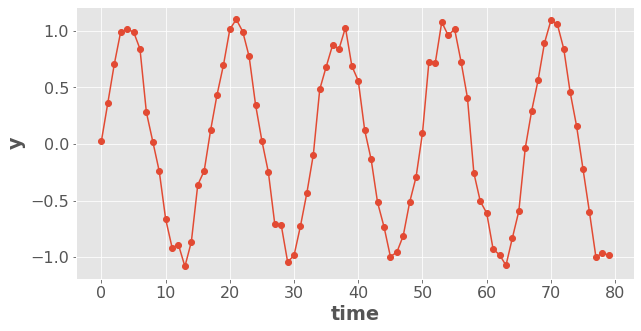

In [6]:
N = 80  
# Set seed for reproduciblity
np.random.seed(1227)
x = np.linspace(0, 30, N)
# Response as function of x with some added normally distributed noise
y = np.sin(x) + np.random.normal(0, 0.1, N)
plt.subplots(1, 1, figsize=(10, 5))
plt.plot(y, marker='o')
plt.xlabel('time')
plt.ylabel('y')
df = pd.DataFrame(y, columns=['y'])

In [5]:
# Response vector
df

,y
0,0.027476
1,0.364072
2,0.704047
...,...
77,-0.996424
78,-0.967081
79,-0.978768


## Wrangling the data

- When working with time series **we wish to use information from past values to help make predictions about future values**
- For supervised machine learning, we need an input feature matrix, *X*, and a response vector, *y*. 
- We can create our features (*X*) by adding columns to our dataframe that are **lagged values of the response**

In [7]:
# Create a copy
df_lag = df.copy()
# Lagged values one period behind
df_lag['y-1'] = df_lag['y'].shift(periods=1)  
# One period ahead
df_lag['y+1'] = df_lag['y'].shift(periods=-1) 
df_lag

,y,y-1,y+1
0,0.027476,NaN,0.364072
1,0.364072,0.027476,0.704047
2,0.704047,0.364072,0.990699
...,...,...,...
77,-0.996424,-0.601826,-0.967081
78,-0.967081,-0.996424,-0.978768
79,-0.978768,-0.967081,NaN


- The custom function above `lag_df` adds an arbitrary number of columns to our dataframe

In [8]:
lag = 1
df_lag = lag_df(df, lag=lag, cols=['y'])
df_lag

,y,y-1
0,0.027476,NaN
1,0.364072,0.027476
2,0.704047,0.364072
...,...,...
77,-0.996424,-0.601826
78,-0.967081,-0.996424
79,-0.978768,-0.967081


**IID ASSUMPTION**
> In the example above, our *y* (the response vector) is the column "y" and our *X* is the column "y-1"
>
> This evidently breaks the IID assumption - that each observation of the dataset is independent and identically distributed
>
> Of course with a time series in practice, the rows are auto-correlated (in fact, we use the correlation to build our model).
> 
> We can think of this as encoding conditional independence - we are assuming that each row is independent of every other given the lagged features. The aim here is to create a predictive model and we can do this with the help of proper and systematic ML development e.g., by using separate training/validation/testing sets.

## Splitting into train/validation/test sets

- We now have a design matrix *X* and a response vector *y* to build our supervised learning model
- The next step is to split the data
- When working with time series we can't randomly split the data as we may be used to doing with other supervised learning algorithms
- We cannot break the temporal order of the data and potentially leak information from the test/validation set into the training set

- In the example below, after randomly splitting our data, we get the same elements appearing in the train and test sets (i.e., we're training our model on something we later want to test it on)

<img src="ts_1.png" alt="Drawing" style="width: 600px; margin: auto;"/>

- Instead we need to split data in a way that **preserves the temporal order of the data**
- The simplest method I know is to just take an split the entire sample in chunks:

<img src="ts_2.png" alt="Drawing" style="width: 420px; margin: auto;"/>

- With our synthetic dataset, this means that we set a fraction of the data for training and the remaining will be dedicated to testing.

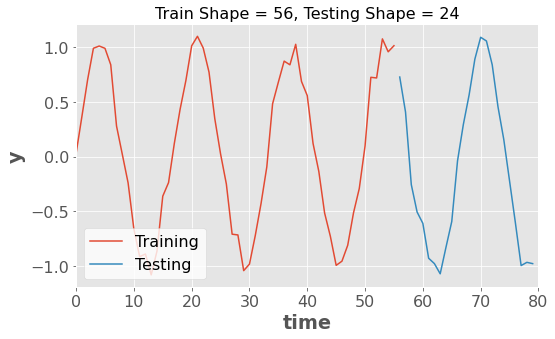

In [10]:
# Training fraction
train_split = 0.7 
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
# Get splitting index
split = int(train_split*len(df))
# Tuple unpacking
df_train, df_test = df.iloc[:split], df.iloc[split:]
# Visualize
ax.plot(df_train['y'], label = 'Training')
ax.plot(df_test['y'], label = 'Testing')
ax.set_xlim(0, N)
ax.set_title(f"Train Shape = {len(df_train)}, Testing Shape = {len(df_test)}",
                fontsize=16)
ax.set_ylabel('y')
ax.legend(loc=3, facecolor='w')
ax.set_xlabel('time')
fig.tight_layout() 

- We then split the remaining training data into training/validation for model optimization

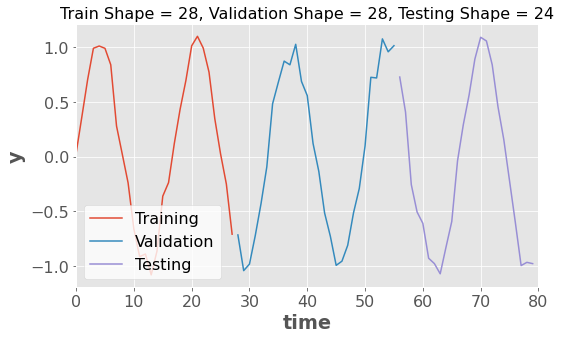

In [11]:
# Fractions
train_split = 0.7
valid_split = 0.5
# Set plot parameters
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
# Obtain indices for splitting
split_1 = int(train_split * len(df))
split_2 = int(valid_split * split_1)
# Split
df_train_valid, df_test = df.iloc[:split_1], df.iloc[split_1:]
df_train, df_valid = df_train_valid[:split_2], df_train_valid[split_2:]
# Visualize
ax.plot(df_train['y'], label = 'Training')
ax.plot(df_valid['y'], label = 'Validation')
ax.plot(df_test['y'], label = 'Testing')
ax.set_xlim(0, N)
ax.set_title(f"Train Shape = {len(df_train)}, Validation Shape = {len(df_valid)}, Testing Shape = {len(df_test)}",
                fontsize=16)
ax.set_ylabel('y')
ax.legend(loc=3, facecolor='w')
ax.set_xlabel('time')
fig.tight_layout()

- With time series data, we can also use another approach similar to cross-validation
- We split the data multiple times incrementally and cumulatively
- We can do this with the help of the `sklearn.model_selection.TimeSeries()` class

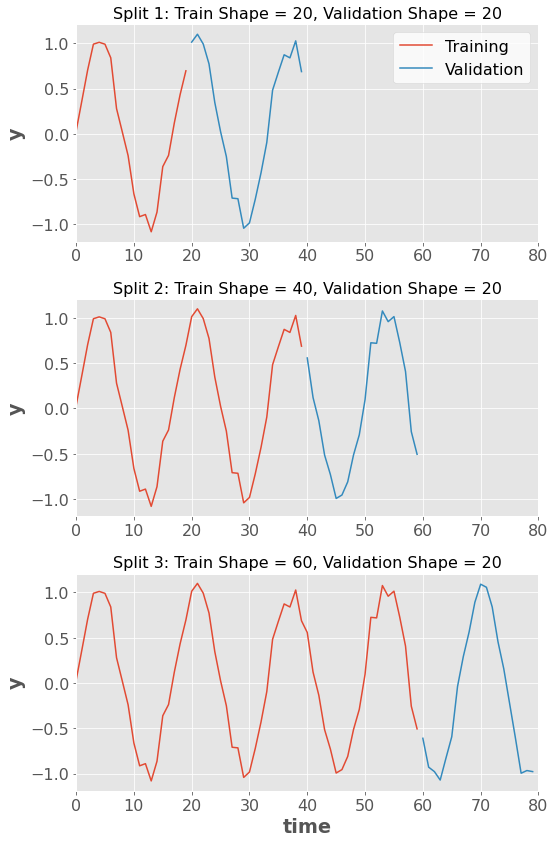

In [12]:
# Set the parameters
n_splits = 3
fig, ax = plt.subplots(n_splits, 1, figsize=(8,4*n_splits))
tscv = TimeSeriesSplit(n_splits=n_splits)
# Split
for i, (train_index, test_index) in enumerate(tscv.split(df)):
    df_train, df_test = df_lag.iloc[train_index], df_lag.iloc[test_index]
    ax[i].plot(df_train['y'], label = 'Training')
    ax[i].plot(df_test['y'], label = 'Validation')
    ax[i].set_xlim(0, N)
    ax[i].set_title(f"Split {i+1}: Train Shape = {len(train_index)}, Validation Shape = {len(test_index)}",
                    fontsize=16)
    ax[i].set_ylabel('y')
ax[0].legend(facecolor='w')
ax[i].set_xlabel('time')
fig.tight_layout()

## Building a supervised learning model

- We will try to model our synthetic dataset with a **random forest regression model**
- We'll explore two potential use cases:
    1. Forecasting one time step ahead
    2. Forecasting multiple time steps ahead

### Forecasting a single time step

- Our model is going to take in lagged value(s) of the response and try to predict the value of the response at the current time
- We can test its performance by passing a `TimeSeriesSplit()` instance into `cross_validate`

In [13]:
# Number of lagged features
lag = 3 
# Number of train/validation splits
n_splits = 3  
# Response
response_col = ['y']
# Matrix of data
df_lag = lag_df(df, lag, response_col).dropna()
# Instantiate the splitter
tscv = TimeSeriesSplit(n_splits=n_splits)  
# Instantiate the estimator
model = RandomForestRegressor()  

cv = cross_validate(model,
                    X = df_lag.drop(columns=response_col),
                    y = df_lag[response_col[0]],
                    cv=tscv,
                    return_train_score=True)

# Cross validate output to populate a dataframe
pd.DataFrame({'split': range(n_splits),
              'train_r2': cv['train_score'],
              'validation_r2': cv['test_score']}).set_index('split')

,train_r2,validation_r2
split,,
0,0.961876,0.855958
1,0.984394,0.902479
2,0.989633,0.954397


- We can also plot our results

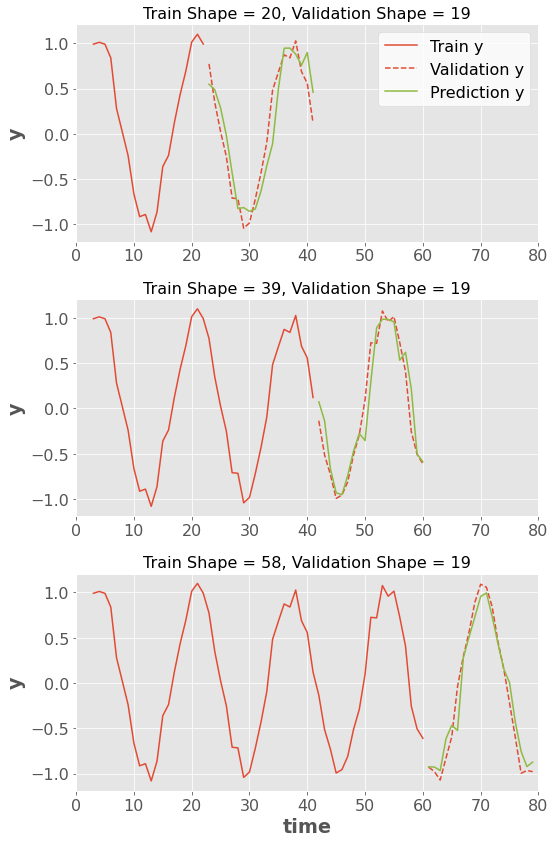

In [14]:
# Visualize
fig, ax = plt.subplots(n_splits, 1, figsize=(8,4*n_splits))
for i, (train_index, test_index) in enumerate(tscv.split(df_lag)):
    df_train, df_test = df_lag.iloc[train_index], df_lag.iloc[test_index]
    # Fit method of the estimator to train
    model = RandomForestRegressor().fit(df_train.drop(columns=response_col),
                                        df_train[response_col[0]]) 
    # Prediction loop
    predictions = model.predict(df_test.drop(columns=response_col))[:,None]

    # Plot
    plot_ts(ax[i], df_train, df_test, predictions, xlim=df_lag.index[-1], response_cols=response_col)
ax[0].legend(facecolor='w')
ax[i].set_xlabel('time')
fig.tight_layout()

- These are just the results of our model predicting *one* time step ahead, i.e., given inputs at time `t`, predict `t+1`
- If we want to see how well our model does at forecasting *multiple time steps* we'll need to do something different.

### Forecasting multiple time steps

- When working with a model that predicts a response as a function of past values of that response, the only way we can forecast multiple steps ahead is with a **for loop** that depend on previous outputs
- As we forecast, the prediction at time *t* will become an input to our model for predicting at time *t+1*

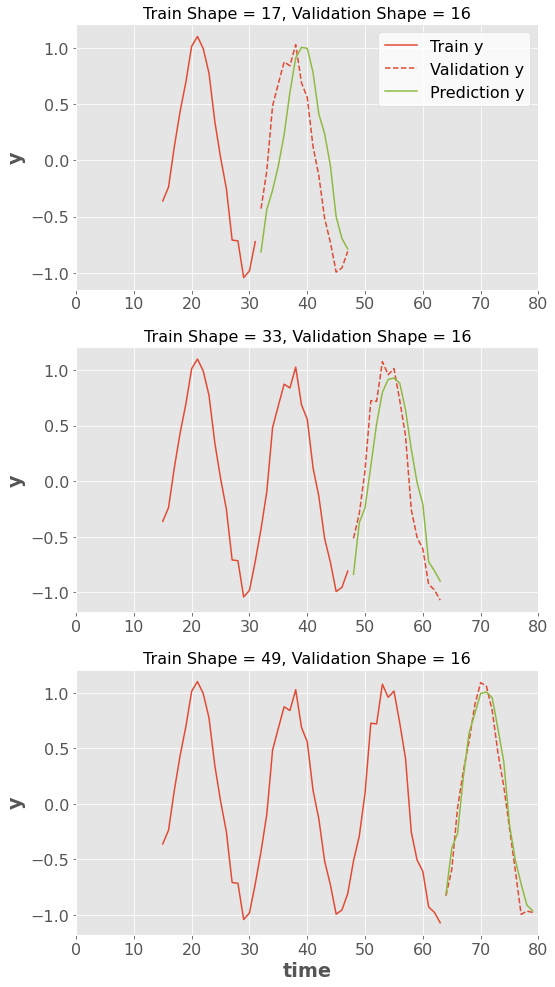

In [18]:
# Number of lagged features
lag = 15
response_col = 'y'
fig, ax = plt.subplots(3, 1, figsize=(8,14))
df_lag = lag_df(df, lag, response_col).dropna()
tscv = TimeSeriesSplit(n_splits=3)
for i, (train_index, test_index) in enumerate(tscv.split(df_lag)):
    # Split
    df_train, df_test = df_lag.iloc[train_index], df_lag.iloc[test_index]
    # Train model
    # Use to_numpy to convert data to NumPy array
    # If not, then we make get a warning
    model = RandomForestRegressor().fit(df_train.drop(columns=response_col).to_numpy(),
                                        df_train[response_col].to_numpy()) 
    # Prediction loop
    # Starting data for first prediction
    input_data = df_lag.iloc[-1, :lag*df.shape[1]].to_numpy() 
    # Use custom function defined above
    predictions = ts_predict(input_data, model, len(df_test))
    
    # Plot
    plot_ts(ax[i], df_train, df_test, predictions, xlim=df_lag.index[-1], response_cols=response_col)
ax[0].legend(facecolor='w')
ax[i].set_xlabel('time')
fig.tight_layout()

- In the above example, I chose `lag=15`
- But how do we choose the best lag?
- We can treat it as a hyperparameter and optimize it

In [19]:
n_splits = 3
# Instantiate the transformer
tscv = TimeSeriesSplit(n_splits=n_splits) 
# Instantiate the estimator
model = RandomForestRegressor()  
# Search loop with containers initialized
l = []
cv_mean = []
cv_std = []
response_col = 'y'
# Hyperparameter between 1 to 21
for lag in range(1, 21):
    df_lag = lag_df(df, lag, response_col).dropna()  
    cv_score = cross_validate(model,
                              df_lag.drop(columns=response_col),
                              df_lag[response_col],
                              cv=tscv)
    l.append(lag)
    cv_mean.append(round(cv_score['test_score'].mean(),3))
    cv_std.append(round(cv_score['test_score'].std(),3))
# Results
(pd.DataFrame({'lag': l,
               'cv_mean': cv_mean,
               'cv_std': cv_std}).set_index('lag')
                                # Sort by score
                                 .sort_values(by='cv_mean', ascending=False)
                                 .head(10)
)

,cv_mean,cv_std
lag,,
17,0.967,0.004
19,0.965,0.006
18,0.963,0.006
...,...,...
10,0.956,0.013
9,0.955,0.010
13,0.951,0.014


- We will use a lag of 17 to re-train a model on the full dataset and use it to forecast an arbitrary number of points ahead

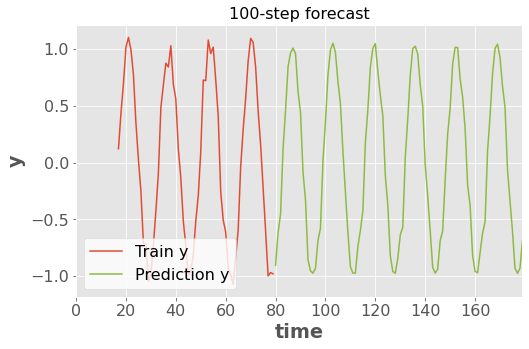

In [21]:
lag = 17
# number of steps to forecast
n = 100  
response_col = 'y'
fig, ax = plt.subplots(1, 1, figsize=(8,5))
df_lag = lag_df(df, lag, response_col).dropna()
model = RandomForestRegressor().fit(df_lag.drop(columns=response_col).to_numpy(),
                                    df_lag[response_col].to_numpy()) 
# Prediction loop
input_data = df_lag.iloc[-1, :lag*df.shape[1]].to_numpy()  
predictions = ts_predict(input_data, model, n)

# Plot
plot_forecast(ax, df_lag, predictions, xlim=df_lag.index[-1], response_cols=response_col)
ax.legend(loc=3, facecolor='w')
ax.set_xlabel('time')

## Working with a real time series data

- We can now try the workflow above on a real time series
- The data we'll be using is of "Retail Sales of Clothing and Clothing Accessory Stores" made available by the Federal Reserve Bank of St Louis and can be accessed [here](https://fred.stlouisfed.org/series/MRTSSM448USN)

In [31]:
df = pd.read_csv('sales_data.csv', index_col=0)
df
# Create a copy
df_fresh = df.copy()

Text(0, 0.5, 'sales')

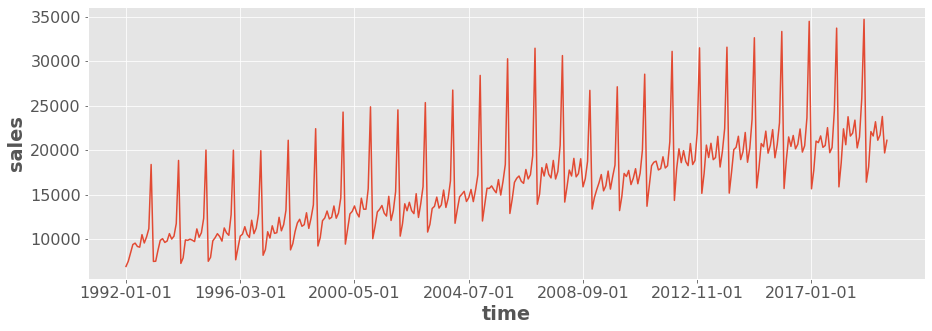

In [24]:
plt.subplots(1, 1, figsize=(15, 5))
df['sales'].plot()
plt.xlabel('time')
plt.ylabel('sales')

- Let's try forecasting this time series (using the exact same methods we used above) with different lags

Text(0.5, 0, 'time (months)')

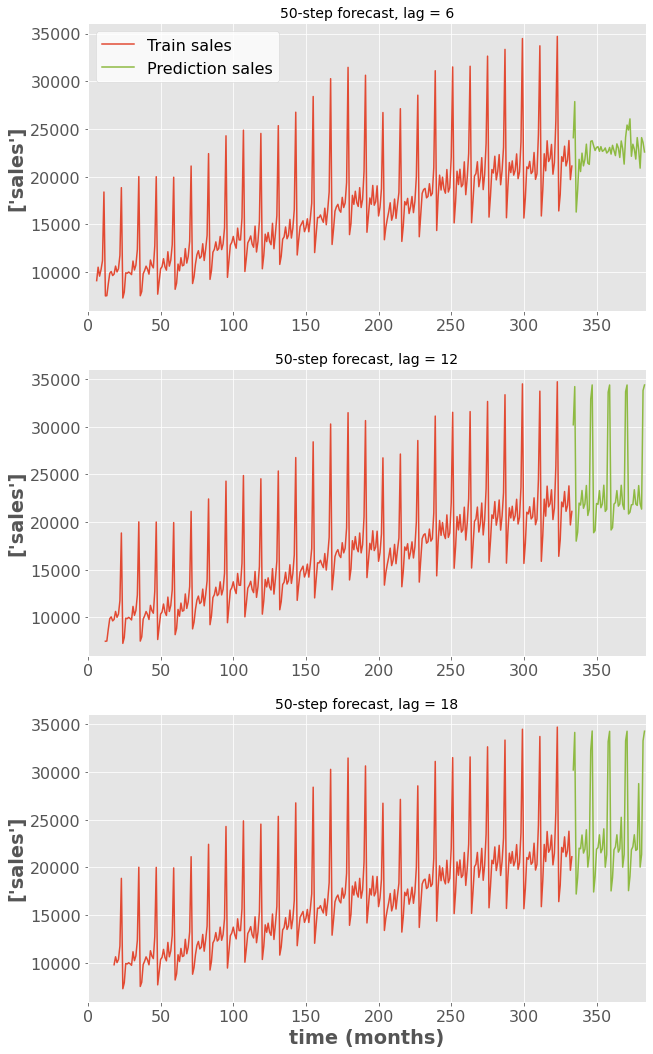

In [25]:
# Parameters
# Forecast length
n = 50 
# Hyperparameters
lag = [6, 12, 18] 
response_col = ['sales']
fig, ax = plt.subplots(len(lag), 1, figsize=(10,18))

# Loop
for k, l in enumerate(lag):

    df_lag = lag_df(df.reset_index().drop(columns='date'), l, [response_col]).dropna()
    model = RandomForestRegressor().fit(df_lag.drop(columns=response_col).to_numpy(),
                                        df_lag[response_col[0]].to_numpy()) 
    # Prediction loop
    input_data = df_lag.iloc[-1, :l*df.shape[1]].to_numpy()  
    predictions = ts_predict(input_data, model, n)

    # Plot
    plot_forecast(ax[k], df_lag, predictions, xlim=len(df_lag)+l, response_cols=response_col)
    ax[k].set_title(ax[k].get_title() + f', lag = {l}', fontsize=14)
    
ax[0].legend(facecolor='w')    
ax[k].set_xlabel('time (months)')

- Although the models trained on higher dimensional data performed better. There seems to be a trend in our model which our random forest will not be able to capture
- We may want to stabilize the mean of the time series to reduce the trend through differencing first

Text(0, 0.5, 'sales')

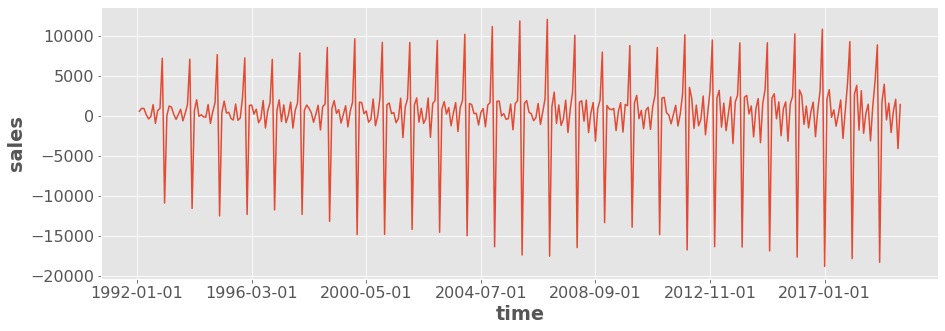

In [29]:
# Get another data
df = df_fresh.copy()
plt.subplots(1, 1, figsize=(15, 5))
# Use the diff() method of pandas series
df['sales'].diff().plot()
plt.xlabel('time')
plt.ylabel('sales')

- Let's try forecasting this time series (using the exact same methods we used above) with different lags

Text(0.5, 0, 'time (months)')

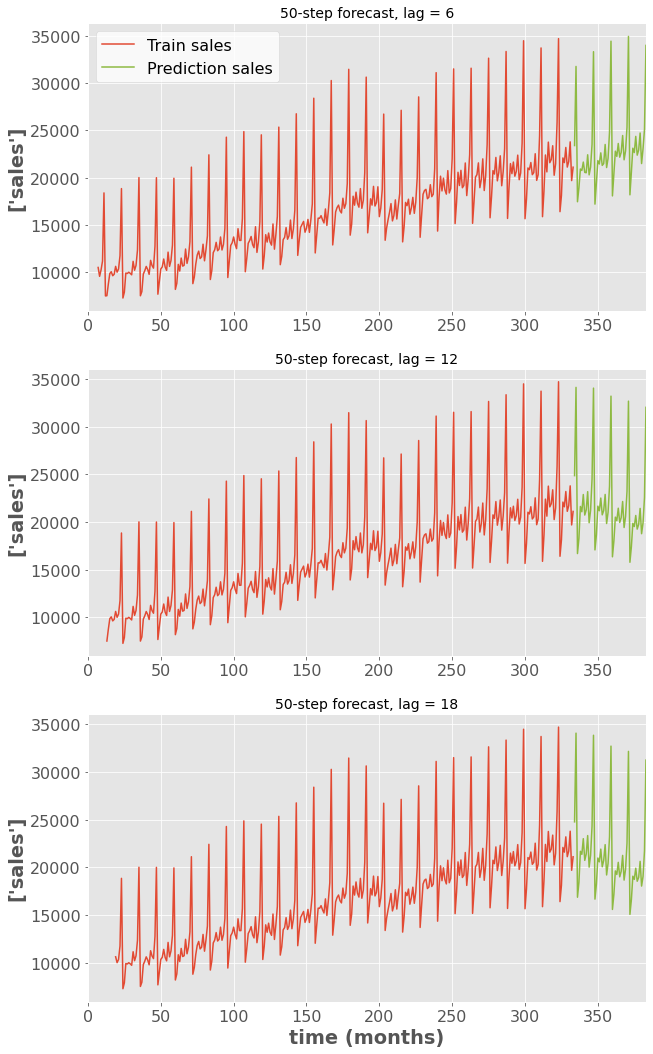

In [30]:
# Parameters
n = 50
lag = [6, 12, 18]
fig, ax = plt.subplots(len(lag), 1, figsize=(10,18))
response_col = ['sales']

# Loop
for k, l in enumerate(lag):

    df_lag = lag_df(df.reset_index().drop(columns='date'), l, response_col).dropna()
    df_start = df_lag.to_numpy()[0, 0]
    df_end = df_lag.to_numpy()[-1, 0]
    df_lag = df_lag.diff().dropna()
    model = RandomForestRegressor().fit(df_lag.drop(columns=response_col).to_numpy(),
                                        df_lag[response_col[0]].to_numpy())  
    # Prediction loop
    input_data = df_lag.iloc[-1, :l*df.shape[1]].to_numpy() 
    predictions = ts_predict(input_data, model, n)

    # Plot
    plot_forecast(ax[k], df_lag[response_col].cumsum() + df_start,
                  np.atleast_2d(np.cumsum(predictions) + df_end).T,
                  xlim=len(df_lag)+l,
                  response_cols=response_col)
    ax[k].set_title(ax[k].get_title() + f', lag = {l}', fontsize=14)
    
ax[0].legend(facecolor='w')    
ax[k].set_xlabel('time (months)')

- We could potentially improve our model by including seasonal differencing or doing some more feature engineering.

## Other time series feature engineering techniques

### Time stamps

- In the examples above we are only incorporating temporal dependence by lagging the response variable
- However, with time-stamped data we may also want to include additional information as features, for example, what month of the year data was recorded, what quarter, was it morning or evening, etc.
- It looks like there's a seasonal pattern in our retail sales data, with a cycle around 12 months
- It might make sense to explicitly add the name of the month that an observation was recorded in as a feature to our model

In [39]:
df_months = df_fresh.copy()
df_months['month'] = pd.DatetimeIndex(df.index).month_name()
df_months

,sales,month
date,,
1992-01-01,6938,January
1992-02-01,7524,February
1992-03-01,8475,March
...,...,...
2019-08-01,23791,August
2019-09-01,19695,September
2019-10-01,21113,October


### Rolling windows

- Another feature engineering option is to look at rolling window stats
- To overcome the problem of data inadequacy in time series, the so-called rolling window method can be employed with the aim of constructing “new” observations using samples of consecutive existing observations. The use of an overlapping rolling window has the advantage of generating substantially more data--- although with the caveat of introducing dependence between consecutive aggregated observations. For a series of data and a fixed window size, the rolling window observations are obtained by shifting a pre-specified window forward over the data set one observation at a time. For a time series with certain periodicity and n observations. A rolling window with size, say t≤n, will contain t number of observations within each window. 
- For example, rather than looking at just the *n* past values, look at the range of the past *n* values, or the mean, or median, etc.

In [40]:
df_rolling = df_fresh.copy()
df_rolling = create_rolling_features(df_rolling, columns='sales', windows=[6, 12])
df_rolling.sample(3)

,sales,rolling_mean_6,rolling_std_6,rolling_var_6,rolling_min_6,rolling_max_6,rolling_min_max_ratio_6,rolling_min_max_diff_6,rolling_mean_12,rolling_std_12,rolling_var_12,rolling_min_12,rolling_max_12,rolling_min_max_ratio_12,rolling_min_max_diff_12
date,,,,,,,,,,,,,,,
1992-11-01,11187,9968.666667,823.021911,6.773651e+05,9103.0,11187.0,0.813712,2084.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.0
2012-10-01,18845,19153.500000,983.989990,9.682363e+05,18266.0,20750.0,0.880289,2484.0,19836.500000,3945.303894,1.556542e+07,14358.0,31108.0,0.461553,16750.0
2017-10-01,20307,20837.666667,1035.661850,1.072595e+06,19720.0,22536.0,0.875044,2816.0,21536.666667,4571.863542,2.090194e+07,15663.0,34482.0,0.454237,18819.0


### We can score the different feature engineering methods

In [41]:
# Just lag
lag = 17  
n_splits = 5  
response_col = ['sales']
df_lag = lag_df(df, lag, response_col).dropna()
tscv = TimeSeriesSplit(n_splits=n_splits)  
model = RandomForestRegressor(random_state=1227)  
cv = cross_validate(model,
                    df_lag.drop(columns=response_col),
                    df_lag[response_col[0]],
                    cv=tscv,
                    return_train_score=True,
                    scoring='neg_mean_absolute_error')
lag_score = abs(cv['test_score'].mean())

# Time stamps (month)
df_months = pd.get_dummies(df_months)
cv = cross_validate(model,
                    df_months.drop(columns=response_col),
                    df_months[response_col[0]],
                    cv=tscv,
                    return_train_score=True,
                    scoring='neg_mean_absolute_error')
month_score = abs(cv['test_score'].mean())

# Rolling statistics
cv = cross_validate(model,
                    df_rolling.drop(columns=response_col),
                    df_rolling[response_col[0]],
                    cv=tscv,
                    return_train_score=True,
                    scoring='neg_mean_absolute_error')
rolling_score = abs(cv['test_score'].mean())

# All of the above
df_all = (df_lag.merge(df_rolling, left_index=True, right_index=True)
                .merge(df_months, left_index=True, right_index=True)
                .drop(columns=['sales_x', 'sales_y']))
cv = cross_validate(model,
                    df_all.drop(columns=response_col),
                    df_all[response_col[0]],
                    cv=tscv,
                    return_train_score=True,
                    scoring='neg_mean_absolute_error')
all_score = abs(cv['test_score'].mean())

# Results
(pd.DataFrame({'FE_method': ['lag', 'months', 'rolling', 'all'],
              'MAE': [lag_score, month_score, rolling_score, all_score]})
   .set_index('FE_method')
   .sort_values(by='MAE'))

,MAE
FE_method,
all,1122.755308
lag,1214.196962
rolling,2667.873745
months,4618.194293


- As can be seen, the combination of all these techniques improved our model most substantially. The columns are as follows:

In [43]:
df_all.columns.tolist()

['sales-1',
 'sales-2',
 'sales-3',
 'sales-4',
 'sales-5',
 'sales-6',
 'sales-7',
 'sales-8',
 'sales-9',
 'sales-10',
 'sales-11',
 'sales-12',
 'sales-13',
 'sales-14',
 'sales-15',
 'sales-16',
 'sales-17',
 'rolling_mean_6',
 'rolling_std_6',
 'rolling_var_6',
 'rolling_min_6',
 'rolling_max_6',
 'rolling_min_max_ratio_6',
 'rolling_min_max_diff_6',
 'rolling_mean_12',
 'rolling_std_12',
 'rolling_var_12',
 'rolling_min_12',
 'rolling_max_12',
 'rolling_min_max_ratio_12',
 'rolling_min_max_diff_12',
 'sales',
 'month_April',
 'month_August',
 'month_December',
 'month_February',
 'month_January',
 'month_July',
 'month_June',
 'month_March',
 'month_May',
 'month_November',
 'month_October',
 'month_September']

## Quantifying uncertainty in forecasts

- For 1-step ahead forecasts:
    - Regression: Quantile regression
    - Classification: Probabilities
    
- For multi-step forecasts
    - Bootstrapped residuals
    - Ensembles

### Quantile regression example

- Rather than modelling *E(Y|X)*, we can model a quantile
- sklearn's [GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor) has this functionality
- One issue is that we need to fit a separate model for each quantile, therefore further reducing sample size

Text(0.5, 0, 'time (months)')

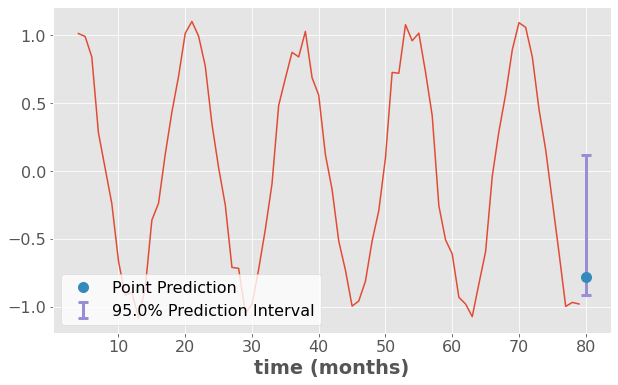

In [45]:
lag = 4
alpha = 0.95
np.random.seed(1227)
x = np.linspace(0, 30, 80)
y = np.sin(x) + np.random.normal(0, 0.1, 80)
df = pd.DataFrame(y, columns=['y'])
df_lag = lag_df(df, lag=lag, cols=['y']).dropna()
input_data = df_lag.iloc[-1, :lag*df.shape[1]].to_numpy()  

# Models

# Model 1
model = GradientBoostingRegressor(loss='quantile', alpha=alpha)
model.fit(df_lag.drop(columns='y').to_numpy(),
          df_lag['y'].to_numpy())  
pU = model.predict(input_data.reshape(1, -1)) 

# Model 2
model.set_params(alpha=1-alpha)
model.fit(df_lag.drop(columns='y').to_numpy(),
          df_lag['y'].to_numpy())
pL = model.predict(input_data.reshape(1, -1))

# Model 3
model.set_params(alpha=0.5)
model.fit(df_lag.drop(columns='y').to_numpy(),
          df_lag['y'].to_numpy())
p = model.predict(input_data.reshape(1, -1))  

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plt.plot(df_lag['y'])
plt.plot(df_lag.index[-1]+1, p, '.', ms=20, label='Point Prediction')
plt.errorbar(df_lag.index[-1]+1, p, yerr=[p-pL, pU-p], lw=0, elinewidth=3, capsize=5, capthick=3,
             label=f'{alpha*100}% Prediction Interval')
plt.legend(facecolor='w', loc=3)
plt.xlabel('time (months)')

### Bootstrapping residuals example

- The idea here is to add some error to each prediction
- The error we add to each prediction is sampled from the model residuals, so we assume errors do not change over time

Text(0.5, 1.0, 'Distribution of residuals')

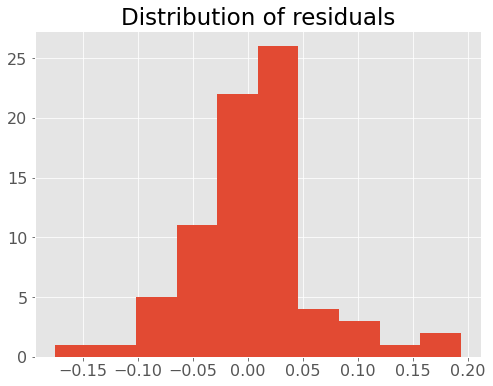

In [48]:
model = RandomForestRegressor().fit(df_lag.drop(columns='y').to_numpy(),
                                    df_lag['y'].to_numpy())
resid = (df_lag['y'] - model.predict(df_lag.drop(columns='y').to_numpy())).to_numpy()
plt.hist(resid)
plt.title('Distribution of residuals')

In [49]:
# Number of steps to forecast
steps = 30  
# Boostrap replicates
sims = 200  

# Prediction loop
# Iinitialize predication container with zeros
predictions = np.zeros(shape=(steps, sims))
for sim in range(sims):
    input_data = df_lag.iloc[-1, :lag*df.shape[1]].to_numpy()
    
    for step in range(steps):
        # Raw prediction
        p = model.predict(input_data.reshape(1, -1))  
        # bootstrapped residuals
        r = resid[np.random.randint(0, len(resid), 1)[0]]  
        predictions[step, sim] = p + r
        # New input data
        input_data = np.append(predictions[step, sim],
                               input_data[:lag-1]) 

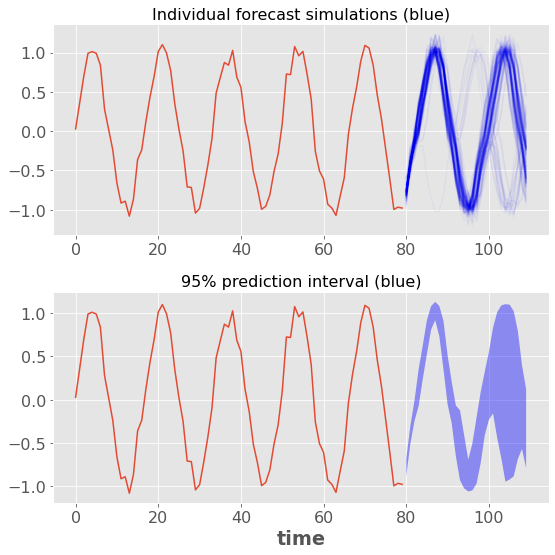

In [50]:
# Plot
fig, ax = plt.subplots(2, 1, figsize=(8,8))
x = np.arange(len(df), len(df)+steps)
ax[0].plot(df['y'], label='Observations')
ax[0].plot(x, 
           predictions,
           '-b', alpha=0.03)
ax[0].set_title('Individual forecast simulations (blue)', fontsize=16)
p5 = np.percentile(predictions, 5, axis=1)
p95 = np.percentile(predictions, 95, axis=1)
ax[1].plot(df['y'], label='Observations')
ax[1].fill_between(x, p5, p95, fc='b', alpha=0.4)
ax[1].set_xlabel('time')
ax[1].set_title('95% prediction interval (blue)', fontsize=16)
fig.tight_layout()

- As can be seen, the further out we try to forecast, the wider the prediction intervals.

# Multivariate time series

- We need a ML model that can forecast for multiple variables (e.g., decision tree, random forest, knn, neural network, etc)

## A synthetic example

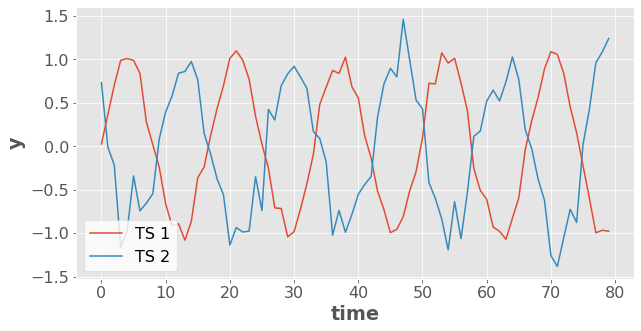

In [51]:
# Generate data
N = 80 
np.random.seed(1227)
x = np.linspace(0, 30, N)
y1 = np.sin(x) + np.random.normal(0, 0.1, N)
y2 = np.cos(x - 5) + np.random.normal(0, 0.2, N)
plt.subplots(1, 1, figsize=(10, 5))
plt.plot(y1, label="TS 1")
plt.plot(y2, label="TS 2")
plt.xlabel('time')
plt.ylabel('y')
plt.legend(loc=3, facecolor='w')
df = pd.DataFrame({'y1': y1,
                   'y2': y2})

In [52]:
lag = 2
df_lag = lag_df(df, lag, ['y1', 'y2']).dropna()
df_lag

,y1,y2,y1-1,y2-1,y1-2,y2-2
2,0.704047,-0.217143,0.364072,-0.009081,0.027476,0.732137
3,0.990699,-1.164482,0.704047,-0.217143,0.364072,-0.009081
4,1.011420,-0.978035,0.990699,-1.164482,0.704047,-0.217143
...,...,...,...,...,...,...
77,-0.996424,0.962528,-0.601826,0.429221,-0.222300,0.021990
78,-0.967081,1.086778,-0.996424,0.962528,-0.601826,0.429221
79,-0.978768,1.241257,-0.967081,1.086778,-0.996424,0.962528


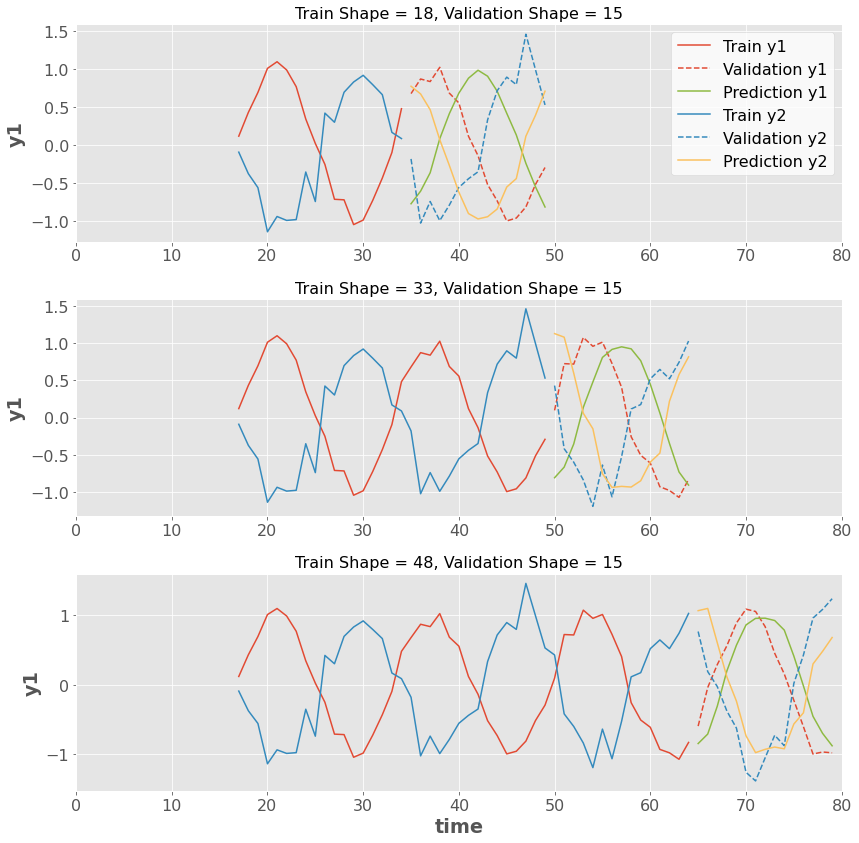

In [53]:
# Parameters
lag = 17
n_splits = 3
fig, ax = plt.subplots(n_splits, 1, figsize=(12,n_splits*4))
df_lag = lag_df(df, cols=df.columns, lag=lag).dropna()
tscv = TimeSeriesSplit(n_splits=n_splits)

# Training
for i, (train_index, test_index) in enumerate(tscv.split(df_lag)):
    df_train, df_test = df_lag.iloc[train_index], df_lag.iloc[test_index]
    model = RandomForestRegressor().fit(df_train.drop(columns=['y1', 'y2']).to_numpy(),
                                        df_train[['y1', 'y2']].to_numpy())  
    # Prediction loop
    input_data = df_lag.iloc[-1, :lag*df.shape[1]].to_numpy()  
    predictions = ts_predict(input_data, model, len(df_test), responses=2)
    
    # Plot
    plot_ts(ax[i], df_train, df_test, predictions, xlim=df_lag.index[-1], response_cols=['y1', 'y2'])
ax[0].legend(facecolor='w')
ax[i].set_xlabel('time')
fig.tight_layout()

- To forecast:

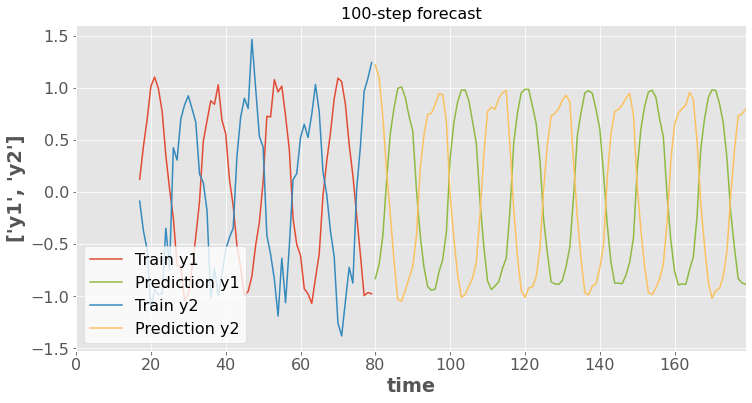

In [54]:
lag = 17
n = 100
fig, ax = plt.subplots(1, 1, figsize=(12,6))
df_lag = lag_df(df, cols=df.columns, lag=lag).dropna()
model = RandomForestRegressor().fit(df_lag.drop(columns=['y1', 'y2']).to_numpy(),
                                    df_lag[['y1', 'y2']].to_numpy())
# Prediction loop
input_data = df_lag.iloc[-1, :lag*df.shape[1]].to_numpy()  
predictions = ts_predict(input_data, model, n, responses=2)

# Plot
plot_forecast(ax, df_lag, predictions, xlim=df_lag.index[-1], response_cols=['y1', 'y2'])
ax.legend(loc=3, facecolor='w')
ax.set_xlabel('time')

# Resources used

Useful python packages/resources:

- [tslearn](https://github.com/tslearn-team/tslearn)
- [sktime](https://github.com/alan-turing-institute/sktime)
- [facebook's prophet](https://github.com/facebook/prophet)
- [microsoft's resources](https://github.com/microsoft/forecasting)

Additional readings:

- [time series prediction intervals are usually too narrow](https://robjhyndman.com/hyndsight/narrow-pi/)
- [always try simple models first!](http://freerangestats.info/blog/2016/01/30/hybrid-forecasts)
- [methods of long-term forecasting with ML](https://thuijskens.github.io/2016/08/03/time-series-forecasting/#fn:2)

Two relevant Kaggle competitions:

- [Estimate the unit sales of Walmart retail goods](https://www.kaggle.com/c/m5-forecasting-accuracy)
- [Estimate the uncertainty distribution of Walmart unit sales](https://www.kaggle.com/c/m5-forecasting-uncertainty)